In [1]:
#Import Libraries
import os 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV  


In [2]:
#Set Working Directory
os.chdir("C:/Users/Mujeeb/Downloads/DATA SCIENTIST/PROJECT/PROJECT 2")

In [3]:
#Load Datasets
train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

# Understanding the Data Distribution

In [4]:
#Checking the first five rows of train data
train.head() 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
#Checking the first five rows of test data
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
#Total number of rows and columns in train data
train.shape

(16067, 7)

In [7]:
#Total number of rows and columns in test data
test.shape

(9914, 6)

In [8]:
#Type of data available in the train dataset
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
#Type of data available in the test dataset
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
#Finding Central tendency and other features of Train data set
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [11]:
#Finding Central tendency and other features of Test data set
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Exploratory Data Analysis

In [12]:
# We need to convert categorical variable "fareamount" in train data to numeric one
train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors = 'coerce') #errors = 'coerce' due to presence of non numeric values in fare_amount

In [13]:
#let us check whether we have changed variable to numeric
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [14]:
#Changing Pickup_Datetime from object to Datetime 
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors = 'coerce')

In [15]:
## Separating all the information from Pickup_datetime column into separate field like year, month, day of the week, etc
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute
train['second']=train['pickup_datetime'].dt.second

In [16]:
# Let us check data types after conversion
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
second                      float64
dtype: object

In [17]:
#Similar operation on Test data
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors = 'coerce')

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute
test['second'] = test['pickup_datetime'].dt.second

In [18]:
#Checking test data
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
second                        int64
dtype: object

In [19]:
### Missing value analysis of train data

#Create dataframe with missing percentage
mv_train = pd.DataFrame(train.isnull().sum())

#Reset index
mv_train = mv_train.reset_index()

#Rename variable
mv_train = mv_train.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
mv_train['Missing_percentage'] = (mv_train['Missing_percentage']/len(train))*100

In [20]:
mv_train

,Variables,Missing_percentage
0,fare_amount,0.155598
1,pickup_datetime,0.006224
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.342317
7,year,0.006224
8,Month,0.006224
9,Date,0.006224


In [21]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 14)
0


In [22]:
#Checking the passenger count variable
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [23]:
#From above observation, passenger_count of 5345 is hypothetical, so we reduce it to max 6 and min 1
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [24]:
#removing passenger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 14)
0


In [74]:
#After running the code for missing value analysis again, we get
mv_train

,Variables,Missing_percentage
0,fare_amount,0.150621
1,pickup_datetime,0.000000
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.000000
7,year,0.000000
8,Month,0.000000
9,Date,0.000000


In [25]:
####Let us resolve missing values in the fare_amount variable
#Lets find decending order of fare to get to find whether the outliers are present
train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
1427         1.14
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
8             NaN
26            NaN
69            NaN
126           NaN
168           NaN
240           NaN
305           NaN
350           NaN
455           NaN
498           NaN
667           NaN
703           NaN
746           NaN
836           NaN
840           NaN
913           NaN
1123          NaN
1574          NaN
1628      

In [26]:
#################### OBSERVATIONS FROM ABOVE OPERATION ##########################
#We can clearly see the outliers at position 1 and 2 
#There is presence of negative values in the dataset
# We can also see fare_amount equal to 0
# We can take outlier range from the values graeter than 3rd observation

## Removing Fare_amount less than or equal to 0
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train = train.drop(train[train["fare_amount"]<1].index, axis=0)

## Removing fare_amount greater than the value of 3rd observation in above dataset that is greater than 454
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)

In [27]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15903, 14)
0


In [28]:
#Dropping off the latitudinal and longitudinal values equal to 0
train = train[train['pickup_longitude']!=0]
train = train[train['pickup_latitude']!=0]
train = train[train['dropoff_longitude']!=0]
train = train[train['dropoff_latitude']!=0]



In [29]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
second               0
dtype: int64

In [30]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
second               0
dtype: int64

In [31]:
#We will make the use of latitudinal and longitudinal variables using Haversine formula to make a new variable call distance
#Calculate the great circle distance between two points on the earth (specified in decimal degrees)

from math import radians, cos, sin, asin, sqrt

def haversine_np(lon1, lat1, lon2, lat2):
    
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Convert to kilometers
    km = 6367 * c
    
    return km

In [32]:
#Creating new variable distance in the train dataset using haversine formula
train['distance_KM'] =  haversine_np(train['pickup_longitude'], train['pickup_latitude'],
                        train['dropoff_longitude'], train['dropoff_latitude'])

In [33]:
#Creating new variable distance in the test dataset using haversine formula
test['distance_KM'] =  haversine_np(test['pickup_longitude'], test['pickup_latitude'],
                        test['dropoff_longitude'], test['dropoff_latitude'])

In [34]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,second,distance_KM
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,21.0,1.030117
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,16.0,8.444828
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,0.0,1.388653
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,42.0,2.797513
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,0.0,1.997902


In [35]:
#Lets check the new distance_KM variable for any outliers
train['distance_KM'].sort_values(ascending=False)

5864     5417.585418
7014     4444.294617
10710     129.868894
14536     129.479111
11619     127.429205
12228     123.483579
5663      101.031147
1684       99.708938
3075       97.923569
9899       97.609268
4487       95.791855
9808       93.866628
7401       92.547706
12349      43.621350
649        39.452190
6308       37.789205
5686       33.828840
4118       32.582065
7021       29.459773
6677       26.352516
4567       25.719759
8105       24.675382
15023      24.110597
15178      23.799988
14099      23.681322
12433      23.498958
4268       23.182116
3216       23.169536
4299       23.154160
12941      23.099656
            ...     
9510        0.000000
270         0.000000
9386        0.000000
9208        0.000000
9177        0.000000
105         0.000000
8834        0.000000
8711        0.000000
10212       0.000000
1265        0.000000
10305       0.000000
1245        0.000000
11313       0.000000
11281       0.000000
11137       0.000000
10959       0.000000
10901       0

In [36]:
#########  OBSERVATIONS of ABOVE VARIABLE ###########
#We can see there are 2 outliers that are very high on position 1st and 2nd
#We can see number of observations having distance_KM value 0


#Lets remove the rows whose distance value is zero
train = train.drop(train[train['distance_KM']== 0].index, axis=0)

#we shall also remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance_KM'] > 130 ].index, axis=0)

In [37]:
#Lets check the new distance_KM variable in test dataset for any outliers
test['distance_KM'].sort_values(ascending=False)

4080    99.933258
8529    98.130769
5887    97.179923
7269    33.583267
4334    28.819072
3569    27.845839
5115    27.635766
9391    27.270748
4864    27.152453
706     25.549928
2487    25.348702
5865    23.428939
5357    23.105734
5905    23.084945
2175    23.036646
8173    22.626014
7787    22.460521
2718    22.393915
248     22.330390
5373    22.118172
8825    22.100081
7346    22.067058
6260    22.050720
628     21.866695
5523    21.866292
7000    21.832153
8876    21.797789
8944    21.771465
7857    21.769008
4018    21.724414
          ...    
121      0.000000
2641     0.000000
1218     0.000000
1429     0.000000
7839     0.000000
451      0.000000
981      0.000000
2675     0.000000
1409     0.000000
7874     0.000000
6954     0.000000
976      0.000000
2618     0.000000
498      0.000000
5443     0.000000
8426     0.000000
8424     0.000000
491      0.000000
318      0.000000
1189     0.000000
2247     0.000000
2936     0.000000
6157     0.000000
9221     0.000000
860      0

In [38]:
#########  OBSERVATIONS of ABOVE TEST DATASET VARIABLE ###########
#We can see there are 3 outliers that are quite high on position 1st 2nd and 3rd
#We can see number of observations having distance_KM value 0


#Lets remove the rows whose distance value is zero
test = test.drop(test[test['distance_KM']== 0].index, axis=0)

#we shall also remove the rows whose distance values is very high which is more than 129kms
test = test.drop(test[test['distance_KM'] > 34 ].index, axis=0)

In [39]:
test.shape

(9826, 14)

In [40]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(15426, 15)
0


# VISUALIZATIONS

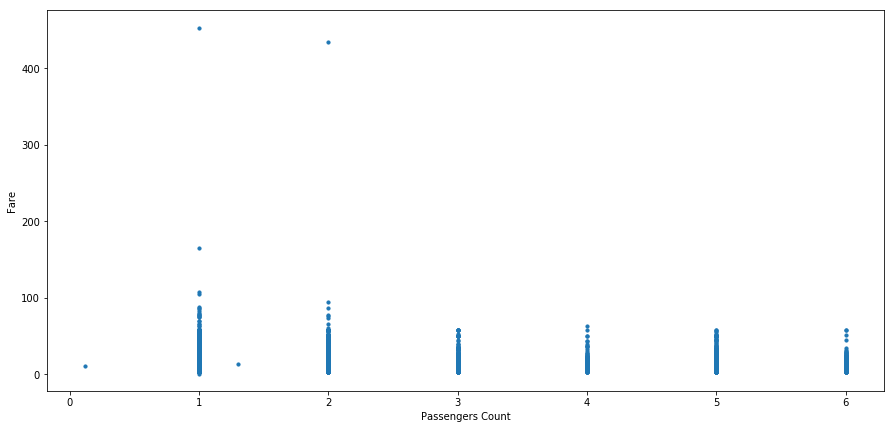

In [41]:
# Plot of passenger_count v/s fare_amount
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('Passengers Count')
plt.ylabel('Fare')
plt.show()

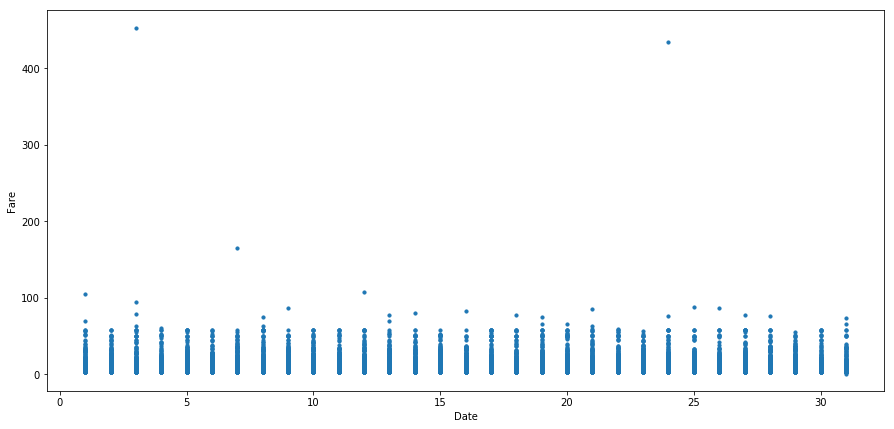

In [105]:
# Plot of date v/s fare_amount
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

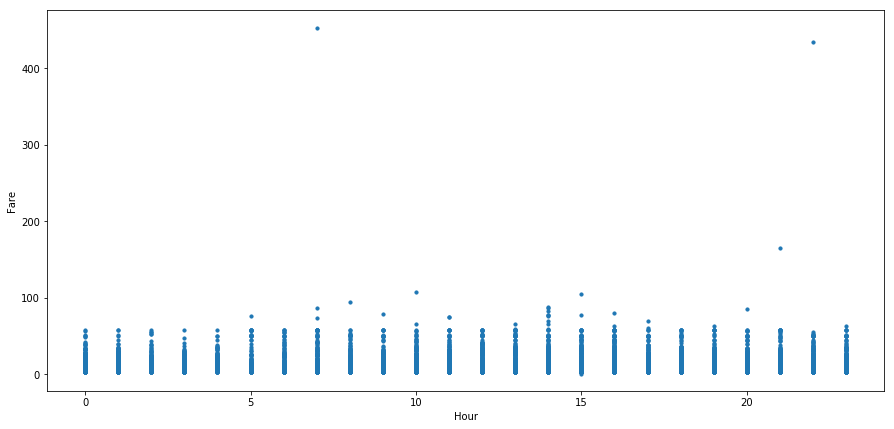

In [42]:
#Plot of Time v/s Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

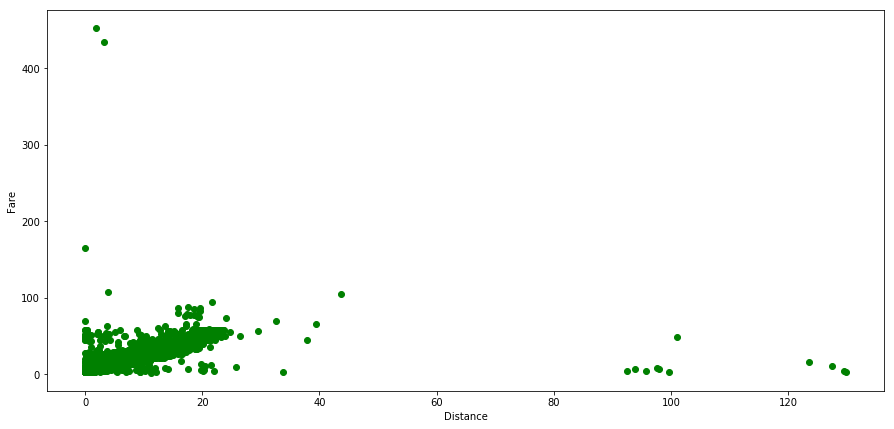

In [43]:
# Plot of distance v/s fare_amount
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance_KM'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

# Feature Scaling

fare_amount


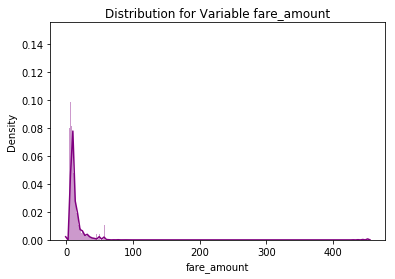

distance_KM


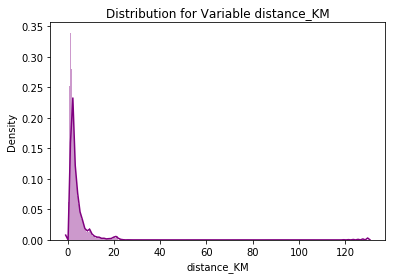

In [44]:
#Normality check of training data whether it is uniformly distributed or not-

for i in ['fare_amount', 'distance_KM']:
    print(i)
    sns.distplot(train[i],bins='auto',color='purple')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

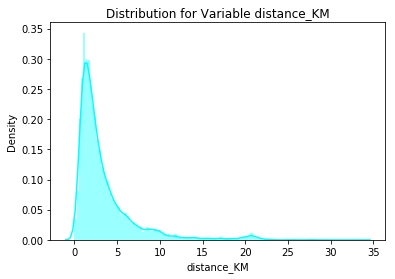

In [45]:
#Normality check whether test data is uniformly distributed or not-

sns.distplot(test['distance_KM'],bins='auto',color='cyan')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# MACHINE LEARNING ALGORITHMS

In [46]:
#Dropping timestamp variable pickup_datetime from train dataset
train = train.drop(['pickup_datetime'], axis =1)

In [47]:
#Dropping timestamp variable pickup_datetime from test dataset
test = test.drop(['pickup_datetime'], axis =1)

In [80]:
## splitting the datasets
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

### Linear Regression model

In [81]:
# Building model on top of training dataset
lr_model = LinearRegression().fit(x_train , y_train)


In [82]:
#predict on train data
lr_pred_train = lr_model.predict(x_train)

In [83]:
#predict on test data
lr_pred_test = lr_model.predict(x_test)

In [84]:
##calculation of RMSE for test data
lr_RMSE_test = np.sqrt(mean_squared_error(y_test, lr_pred_test))

##calculation of RMSE for train data
lr_RMSE_train= np.sqrt(mean_squared_error(y_train, lr_pred_train))

In [85]:
print("Root Mean Squared Error For Train data = "+str(lr_RMSE_train))
print("Root Mean Squared Error For Test data = "+str(lr_RMSE_test))

Root Mean Squared Error For Train data = 8.638028547765424
Root Mean Squared Error For Test data = 7.40217865766825


In [86]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, lr_pred_train)

0.391633378552518

In [87]:
r2_score(y_test, lr_pred_test)

0.30570620798025305

### Decision Tree Model

In [88]:
dt_model = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [89]:
#prediction on train data
dt_pred_train = dt_model.predict(x_train)

#prediction on test data
dt_pred_test = dt_model.predict(x_test)

In [90]:
##calculating RMSE for train data
dt_RMSE_train = np.sqrt(mean_squared_error(y_train, dt_pred_train))

##calculating RMSE for test data
dt_RMSE_test = np.sqrt(mean_squared_error(y_test, dt_pred_test))

In [91]:
print("Root Mean Squared Error For Train data = "+str(dt_RMSE_train))
print("Root Mean Squared Error For Test data = "+str(dt_RMSE_test))

Root Mean Squared Error For Train data = 7.546078446412026
Root Mean Squared Error For Test data = 4.927298293129025


In [92]:
## R^2 calculation for train data
r2_score(y_train, dt_pred_train)

0.5357213217283123

In [93]:
## R^2 calculation for test data
r2_score(y_test, dt_pred_test)

0.6923606637090598

### Random Forest Model

In [94]:
rf_model = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [95]:
#prediction on train data
rf_pred_train = rf_model.predict(x_train)
#prediction on test data
rf_pred_test = rf_model.predict(x_test)

In [96]:
##calculating RMSE for train data
rf_RMSE_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
##calculating RMSE for test data
rf_RMSE_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))

In [97]:
print("Root Mean Squared Error For Train data = "+str(rf_RMSE_train))
print("Root Mean Squared Error For Test data = "+str(rf_RMSE_test))

Root Mean Squared Error For Train data = 2.7086536274792317
Root Mean Squared Error For Test data = 3.8912780007239913


In [98]:
## calculate R^2 for train data
r2_score(y_train, rf_pred_train)

0.9401804621687151

In [99]:
#calculate R^2 for test data
r2_score(y_test, rf_pred_test)

0.8081292939222674

### Gradient Boosting

In [100]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)

In [101]:
#prediction on train data
gb_pred_train = gb_model.predict(x_train)

#prediction on test data
gb_pred_test = gb_model.predict(x_test)

In [102]:
##calculating RMSE for train data
gb_RMSE_train = np.sqrt(mean_squared_error(y_train, gb_pred_train))
##calculating RMSE for test data
gb_RMSE_test = np.sqrt(mean_squared_error(y_test, gb_pred_test))

In [103]:
print("Root Mean Squared Error For Train data = "+str(gb_RMSE_train))
print("Root Mean Squared Error For Test data = "+str(gb_RMSE_test))

Root Mean Squared Error For Train data = 4.846031394000225
Root Mean Squared Error For Test data = 3.895717157155674


In [104]:
#calculate R^2 for test data
r2_score(y_test, gb_pred_test)

0.8076912733479873

In [105]:
#calculate R^2 for train data
r2_score(y_train, gb_pred_train)

0.8085265534724446

## Result optimization by Parameters tuning

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [107]:
###### RANDOM HYPERPARAMETER GRID ######
from sklearn.model_selection import train_test_split,RandomizedSearchCV

##Random Search CV on Random Forest Model

RFR = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RFR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(x_train,y_train)
predictions_RFR = randomcv_rf.predict(x_test)

RFR_best_params = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RFR = best_model.predict(x_test)

#R^2
r2_RFR = r2_score(y_test, predictions_RFR)
#Calculating RMSE
rmse_RFR = np.sqrt(mean_squared_error(y_test,predictions_RFR))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',RFR_best_params)
print('R-squared = {:0.2}.'.format(r2_RFR))
print('RMSE = ',rmse_RFR)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  3.9280976681146935


In [108]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [109]:
##Random Search CV on gradient boosting model

GBR = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(GBR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(x_train,y_train)
predictions_GBR = randomcv_gb.predict(x_test)

GBR_best_params = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_GBR = best_model.predict(x_test)

#R^2
r2_GBR = r2_score(y_test, predictions_GBR)
#Calculating RMSE
rmse_GBR = np.sqrt(mean_squared_error(y_test,predictions_GBR))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',GBR_best_params)
print('R-squared = {:0.2}.'.format(r2_GBR))
print('RMSE = ', rmse_GBR)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  4.2991647860290785


In [110]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
rf_cv = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
rf_gridcv = GridSearchCV(rf_cv, param_grid = grid_search, cv = 5)
rf_gridcv = rf_gridcv.fit(x_train,y_train)
rf_cv_best_params = rf_gridcv.best_params_

#Apply model on test data
rf_cv_predictions = rf_gridcv.predict(x_test)

#R^2
r2_rf_cv = r2_score(y_test, rf_cv_predictions)
#Calculating RMSE
rmse_rf_cv = np.sqrt(mean_squared_error(y_test,rf_cv_predictions))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',rf_cv_best_params)
print('R-squared = {:0.2}.'.format(r2_rf_cv))
print('RMSE = ',(rmse_rf_cv))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 13}
R-squared = 0.79.
RMSE =  4.025965650877242


In [111]:
#Grid Search cross validation on gradient boosting model
gb_cv = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb_cv, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(x_train,y_train)
gb_cv_best_params = gridcv_gb.best_params_

#Apply model on test data
gb_cv_predictions = gridcv_gb.predict(x_test)

#R^2
r2_gb_cv = r2_score(y_test, gb_cv_predictions)
#Calculating RMSE
rmse_gb_cv = np.sqrt(mean_squared_error(y_test,gb_cv_predictions))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',gb_cv_best_params)
print('R-squared = {:0.2}.'.format(r2_gb_cv))
print('RMSE = ',(rmse_gb_cv))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  4.006929330209096


# Prediction of fare amount for test data

In [112]:
### Considering the RMSE and R^2 scores, we have selected Gradient Boosting model for prediction of fare

#Grid Search cross validation on gradient boosting model
gb_cv = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb_cv, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(x_train,y_train)
gb_cv_best_params = gridcv_gb.best_params_

#Apply model on test data
gb_cv_predictions_final = gridcv_gb.predict(test)


In [113]:
# Let us check the final predicted fare
gb_cv_predictions_final

array([ 9.21043405,  9.54652828,  6.31370778, ..., 48.70520624,
       21.07392644,  6.94254308])

In [114]:
#Inserting the above variable in test dataset
test['Predicted_Cab_fare'] = gb_cv_predictions_final

In [115]:
drop = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
test = test.drop(drop, axis = 1)

In [116]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,Minute,second,distance_KM,Predicted_Cab_fare
0,1,2015,1,27,1,13,8,24,2.321801,9.210434
1,1,2015,1,27,1,13,8,24,2.423830,9.546528
2,1,2011,10,8,5,11,53,44,0.618239,6.313708
3,1,2012,12,1,5,21,12,12,1.959801,8.995907
4,1,2012,12,1,5,21,12,12,5.383919,14.816536


In [117]:
test.to_csv('predicted_test.csv')